# Estadística descriptiva con Pandas

Este tutorial es una adaptación al español de los materiales del curso [Quantitative Neuroscience](http://www.compneurosci.com/NSCI801.html) desarrollado por Gunnar Blohm y Joe Nashed en la [Universidad de Queens](https://www.queensu.ca/). 

También incluye fragmentos de los tutoriales [Python Statistics Fundamentals: How to Describe Your Data](https://realpython.com/python-statistics/#summary-of-descriptive-statistics) y [NumPy, SciPy, and Pandas: Correlation With Python](https://realpython.com/numpy-scipy-pandas-correlation-python/#linear-correlation)
desarrollados por Mirko Stojiljković en el portal Real Python.

## Medidas de estadística descriptiva

Todas las estadísticas descriptivas son medidas de tendencia central o medidas de variabilidad, también conocidas como medidas de dispersión. 

Las medidas de tendencia central se centran en los promedios o valores medios de los conjuntos de datos; mientras que las medidas de variabilidad se centran en la dispersión de los datos. 

Estas dos medidas utilizan gráficos, tablas y discusiones generales para ayudar a las personas a comprender el significado de los datos analizados.

### Resumen global de medidas estadísticas

Pandas ofrece rutinas útiles para obtener rápidamente estadísticas descriptivas con una sola función o llamada a un método. 

Puedes usar `describe()` así:

In [1]:
import pandas as pd

sw = pd.read_csv(
    "https://raw.githubusercontent.com/gastonstat/matrix4sl/master/data/starwars.csv"
)
sw.head()

,name,gender,height,weight,eyecolor,haircolor,skincolor,homeland,born,died,jedi,species,weapon
0,Anakin Skywalker,male,1.88,84.0,blue,blond,fair,Tatooine,41.9BBY,4ABY,yes_jedi,human,lightsaber
1,Padme Amidala,female,1.65,45.0,brown,brown,light,Naboo,46BBY,19BBY,no_jedi,human,unarmed
2,Luke Skywalker,male,1.72,77.0,blue,blond,fair,Tatooine,19BBY,unk_died,yes_jedi,human,lightsaber
3,Leia Organa,female,1.50,49.0,brown,brown,light,Alderaan,19BBY,unk_died,no_jedi,human,blaster
4,Qui-Gon Jinn,male,1.93,88.5,blue,brown,light,unk_planet,92BBY,32BBY,yes_jedi,human,lightsaber


In [2]:
sw.describe()

,height,weight
count,20.000000,19.000000
mean,1.789000,74.868421
std,0.632405,30.112678
min,0.660000,17.000000
25%,1.665000,62.500000
50%,1.790000,78.000000
75%,1.892500,82.000000
max,3.900000,159.000000


Este método devuelve un nuevo DataFrame que contiene lo siguiente:

- count: la cantidad de elementos en su conjunto de datos
- mean: la media de su conjunto de datos
- std: la desviación estándar de su conjunto de datos
- min y max: los valores mínimo y máximo de su conjunto de datos
- 25%, 50% y 75%: los cuartiles de su conjunto de datos

Si deseas que el objeto Serie resultante contenga otros percentiles, debes especificar el valor de los percentiles de los parámetros opcionales.

Puedes calcular cada resultado por separado llamando a los métodos específicos:

In [9]:
sw.count()

name         20
gender       20
height       20
weight       19
eyecolor     18
haircolor    18
skincolor    17
homeland     20
born         20
died         20
jedi         20
species      20
weapon       20
dtype: int64

In [5]:
sw.mean(numeric_only=True)

height     1.789000
weight    74.868421
dtype: float64

In [6]:
sw.std(numeric_only=True)

height     0.632405
weight    30.112678
dtype: float64

In [7]:
sw.min(numeric_only=True)

height     0.66
weight    17.00
dtype: float64

In [8]:
sw.max(numeric_only=True)

height      3.9
weight    159.0
dtype: float64

In [18]:
sw.quantile(0.25, numeric_only=True)

height     1.665
weight    62.500
Name: 0.25, dtype: float64

In [19]:
sw.quantile(0.75, numeric_only=True)

height     1.8925
weight    82.0000
Name: 0.75, dtype: float64

### Forma de la distribución

La asimetría es un parámetro para medir la simetría de un conjunto de datos y la curtosis para medir qué tan pesadas son sus colas en comparación con una distribución normal.

Veámoslo en nuestro ejemplo:

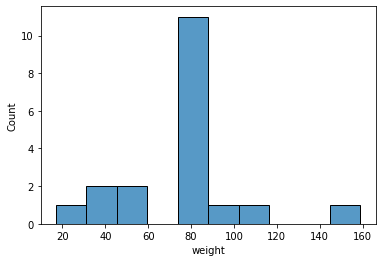

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x="weight", data=sw)
plt.show()

In [24]:
print("skew:", sw["weight"].skew())
print("kurtosis:", sw["weight"].kurtosis())

skew: 0.7274902112518916
kurtosis: 2.871429772733397


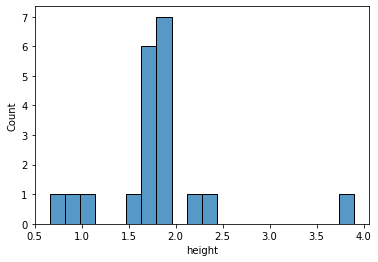

In [26]:
sns.histplot(x="height", data=sw)
plt.show()

In [28]:
print("skew:", sw["height"].skew())
print("kurtosis:", sw["height"].kurtosis())

skew: 1.6310448597414178
kurtosis: 6.5905839871644964


También podemos armar un reporte integrado:

In [58]:
skew = sw.skew(numeric_only=True)
skew.name = "skew"

kurt = sw.kurtosis(numeric_only=True)
kurt.name = "kurtosis"

iqr = sw.quantile(0.75) - sw.quantile(0.25)
iqr.name = "IQR"

var = sw.std(numeric_only=True) ** 2
var.name = "var"

extra = pd.DataFrame([var, iqr, skew, kurt])

pd.concat([sw.describe(), extra])

,height,weight
count,20.000000,19.000000
mean,1.789000,74.868421
std,0.632405,30.112678
min,0.660000,17.000000
25%,1.665000,62.500000
50%,1.790000,78.000000
75%,1.892500,82.000000
max,3.900000,159.000000
var,0.399936,906.773392
IQR,0.227500,19.500000


## Análisis de correlación 

La correlación está estrechamente relacionada con otras cantidades estadísticas como la media, la desviación estándar, la varianza y la covarianza. 

Hay varias estadísticas que puedes utilizar para cuantificar la correlación. En esta sección, aprenderás acerca de tres coeficientes de correlación:

- R de Pearson
- Rho de Spearman
- Tau de Kendall

El coeficiente de Pearson mide la correlación lineal, mientras que los coeficientes de Spearman y Kendall comparan los rankings de datos. Hay métodos de Pandas que pueden utilizar para calcular estos coeficientes. También puedes utilizar Seaborn para ilustrar convenientemente los resultados.

En Pandas puedes llamar al método `.corr()` presente en los objetos de tipo Series o DataFrame. 

>**Nota:** Cuando trabajes con instancias de DataFrame, debes tener en cuenta que las filas son observaciones y las columnas son características o variables.

In [59]:
corr_matrix = sw.corr()
corr_matrix

,height,weight
height,1.000000,0.853301
weight,0.853301,1.000000


La matriz de correlación resultante es una nueva instancia de DataFrame y contiene los coeficientes de correlación para las columnas `sw['height']` y `sw['weight']`. Estos resultados etiquetados suelen ser muy convenientes para trabajar porque puedes acceder a ellos con sus etiquetas o sus índices de posición:

In [63]:
print(corr_matrix.at["height", "weight"])
print(corr_matrix.iat[0, 1])

0.8533009433159517
0.8533009433159517


Este ejemplo muestra dos formas de acceder a los valores:

- Utiliza `.at[]` para acceder a un solo valor por sus etiquetas de fila y columna.
- Utiliza `.iat[]` para acceder a un valor por sus posiciones de su fila y columna.

O de manera más sencilla:

In [76]:
print(corr_matrix["height"])

height    1.000000
weight    0.815491
Name: height, dtype: float64


In [77]:
print(corr_matrix["weight"])

height    0.815491
weight    1.000000
Name: weight, dtype: float64


Puedes usar `.corr()` para calcular los tres coeficientes de correlación:

- 'pearson'
- 'spearman'
- 'kendall'

In [64]:
pearson_corr_matrix = sw.corr(method="pearson")
pearson_corr_matrix

,height,weight
height,1.000000,0.853301
weight,0.853301,1.000000


In [65]:
spearman_corr_matrix = sw.corr(method="spearman")
spearman_corr_matrix

,height,weight
height,1.000000,0.936236
weight,0.936236,1.000000


In [66]:
kendall_corr_matrix = sw.corr(method="kendall")
kendall_corr_matrix

,height,weight
height,1.000000,0.815491
weight,0.815491,1.000000




Puedes aplicar `.corr()` de la misma manera con los objetos DataFrame que contienen tres o más columnas:

In [67]:
davis_data = pd.read_csv(
    "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Davis.txt",
    sep=r"\s{1,}",
    engine="python",
)
davis_data.head()

,sex,weight,height,reportedWeight,reportedHeight
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [68]:
davis_data.corr()

,weight,height,reportedWeight,reportedHeight
weight,1.000000,0.189650,0.835841,0.636326
height,0.189650,1.000000,0.603269,0.744637
reportedWeight,0.835841,0.603269,1.000000,0.761860
reportedHeight,0.636326,0.744637,0.761860,1.000000


### Mapas de calor de matrices de correlación

¡La matriz de correlación puede volverse realmente grande y confusa cuando tiene muchas funciones! Afortunadamente, puedes presentarlo visualmente como un mapa de calor donde cada campo tiene el color que corresponde a su valor.

Para realizarlo, nos apoyaremos en la función `heatmap` presente en el paquete seaborn:

<AxesSubplot:>

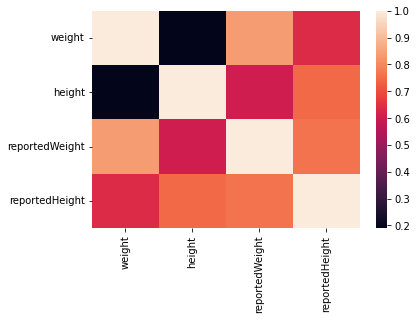

In [69]:
import seaborn as sns

sns.heatmap(davis_data.corr())

Si tienes tiempo, te invito a revisar los tutoriales originales.